<a href="https://colab.research.google.com/github/Pavitra-khare/DA6401_Deep_learning/blob/main/DL_Assignment1_ALL_QUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

In [3]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


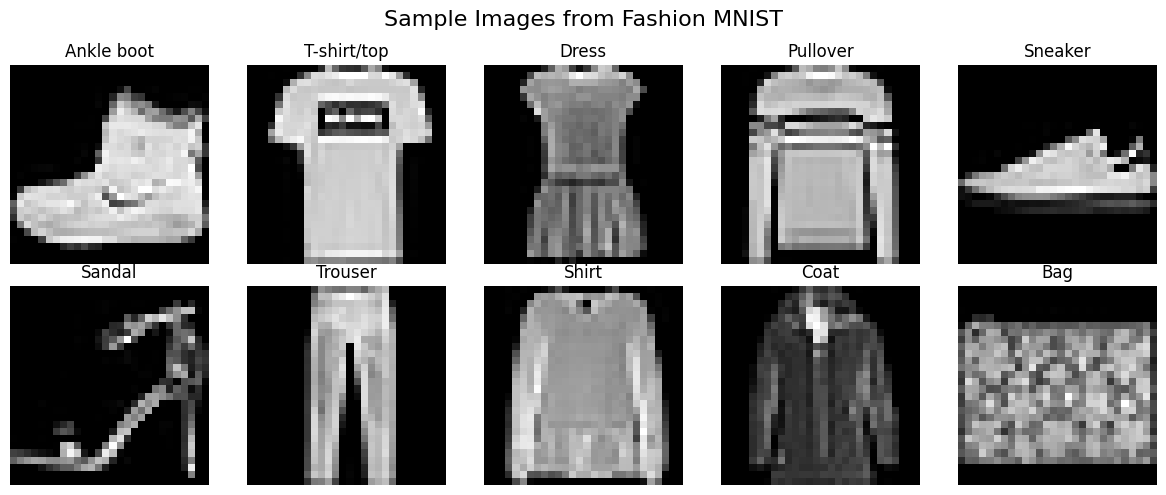

In [2]:
import os
import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Initialize Weights & Biases (W&B) for experiment tracking
wandb.init(project="DA6401_ASS-practice")

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for Fashion MNIST
def get_class_names():
    return [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]

# Select one sample image for each class
def select_sample_images(images, labels, class_names):
    chosen_images = []
    seen_labels = set()
    for idx, lbl in enumerate(labels):
        if lbl not in seen_labels:
            chosen_images.append((images[idx], class_names[lbl]))
            seen_labels.add(lbl)
        if len(chosen_images) == len(class_names):
            break
    return chosen_images

# Plot sample images
def plot_sample_images(sample_images):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle("Sample Images from Fashion MNIST", fontsize=16)

    for ax, (image, label) in zip(axes.flatten(), sample_images):
        ax.imshow(image, cmap='gray')
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    return fig

# Main Execution
class_names = get_class_names()
sample_images = select_sample_images(train_images, train_labels, class_names)
fig = plot_sample_images(sample_images)

# Log the figure to W&B
wandb.log({"Sample MNIST Images": fig})
wandb.finish()

#constants

In [4]:
import os
import numpy as np
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import wandb
ep = 10
bs = 30
lf = 'cross_entropy'
op = 'nadam'
lr = 1e-3
data_set = 'fashion_mnist'

m_beta = 0.9
rmsprop_beta = 0.9
beta_1 = 0.9
beta_2 = 0.999
epsilon_ = 1e-3
wdc = 0
winit = 'Xavier'
nhls = 3
hls = 128
af = 'relu'
# constants
INPUT_KEY = 'input_size'
OUTPUT_KEY = 'output_size'
FUN_KEY = "function"

In [5]:
import numpy as np
from keras.datasets import fashion_mnist, mnist
from sklearn.model_selection import train_test_split

def map_data_with_classes(labels):

    num_samples = len(labels)
    num_classes = max(labels) + 1
    one_hot_matrix = np.zeros((num_samples, num_classes))

    for idx, label in enumerate(labels):
        one_hot_matrix[idx][label] = 1

    return one_hot_matrix



In [6]:
# Load the dataset based on the chosen option
if data_set == 'fashion_mnist':
    (train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
elif data_set == 'mnist':
    (train_X, train_Y), (test_X, test_Y) = mnist.load_data()
else:
    raise ValueError("Invalid dataset choice! Choose 'fashion_mnist' or 'mnist'.")

train_X, test_X = train_X / 255.0, test_X / 255.0

needed_y_train, needed_y_test = train_Y, test_Y

# Split dataset into training and validation sets
trainX, val_X, trainy, valy = train_test_split(train_X, train_Y, test_size=0.1, random_state=40)

# Reshape images into 1D feature vectors
trainX = trainX.reshape(trainX.shape[0], -1)
testX = test_X.reshape(test_X.shape[0], -1)
valX = val_X.reshape(val_X.shape[0], -1)

# Adjust dataset size to be multiples of 128
batch_size = 128
trainX, testX, valX = (arr[:(len(arr) // batch_size) * batch_size] for arr in [trainX, testX, valX])
trainy, test_Y, valy = (arr[:(len(arr) // batch_size) * batch_size] for arr in [trainy, test_Y, valy])

# Convert class labels into one-hot encoded format
trainy = map_data_with_classes(trainy)
testy = map_data_with_classes(test_Y)
valiy = map_data_with_classes(valy)

# Determine input and output layer sizes
input_layer_size = trainX.shape[1]
output_layer_size = trainy.shape[1]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# ACTIVATION FUNCTION

In [7]:
import numpy as np

def sigmoid(x):
    """Computes the sigmoid activation function."""
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    """Computes the hyperbolic tangent (tanh) activation function."""
    return np.tanh(x)

def relu(x):
    """Computes the ReLU (Rectified Linear Unit) activation function."""
    return np.maximum(0, x)

def softmax(x):

    x_shifted = x - np.max(x, axis=1, keepdims=True)  # Improve numerical stability
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(y_hat, y):

    epsilon = 1e-9  # Avoid log(0) errors
    return -np.mean(np.sum(y * np.log(y_hat + epsilon), axis=1))

def mean_squared_error(y_hat, y):

    return np.mean((y - y_hat) ** 2)

def activation_functions(x, fn_label="sigmoid"):

    activations = {
        "relu": relu,
        "sigmoid": sigmoid,
        "tanh": tanh,
        "softmax": softmax
    }
    return activations.get(fn_label, lambda x: "error")(x)

def activation_derivative(x, fn_label="sigmoid"):

    derivatives = {
        "relu": lambda x: np.where(x > 0, 1, 0),
        "tanh": lambda x: 1.0 - np.tanh(x) ** 2,
        "sigmoid": lambda x: sigmoid(x) * (1 - sigmoid(x))
    }
    return derivatives.get(fn_label, lambda x: "error")(x)


In [8]:
def initialize_weights_and_biases(layers, number_hidden_layers=1, init_type='random'):

    weights, biases = [], []

    for i in range(number_hidden_layers + 1):
        input_dim, output_dim = layers[i]["input_size"], layers[i]["output_size"]

        if init_type == 'random':
            w = np.random.randn(output_dim, input_dim) * 0.01
            b = np.zeros((output_dim, 1))
        else:
            bound = np.sqrt(6 / (input_dim + output_dim))
            w = np.random.uniform(-bound, bound, (output_dim, input_dim))
            b = np.random.uniform(-bound, bound, (output_dim, 1))


        weights.append(w)
        biases.append(b)

    return weights, biases

In [9]:
def train_accuracy(batch_testy, y_predicted, trainy):

    correct_count = 0

    for i in range(len(batch_testy)):
        for j in range(len(batch_testy[i])):
            actual_label = np.argmax(batch_testy[i][j])
            predicted_label = np.argmax(y_predicted[i][j])

            if predicted_label == actual_label:
                correct_count += 1

    return correct_count / len(trainy)


In [10]:
def test_accuracy(testX, testy, weights, biases, number_hidden_layers, activation_function, output_function):

    _, activations = forward_propagation(testX, weights, biases, number_hidden_layers, activation_function, output_function)
    y_pred = activations[-1]  # Get final layer activations
    y_predicted = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

    # Convert testy to class indices if one-hot encoded
    if testy.ndim > 1 and testy.shape[1] > 1:
        testy = np.argmax(testy, axis=1)

    # Ensure both lists are of the same length
    min_len = min(len(y_predicted), len(testy))
    return np.mean(y_predicted[:min_len] == testy[:min_len])


In [11]:
def calculate_regularizing_term(y, weight_decay_const, number_hidden_layers, weights):

    total_weight_sum = sum(np.sum(weight ** 2) for weight in weights)
    return (weight_decay_const / (2 * len(y))) * total_weight_sum


# Question-2 Forward Propogation

In [12]:
def forward_propagation(input_x, W, B, hidden_layers, activ_label, op_label):


    # Initialize lists for activations and hidden states
    a, h = [], []

    # Reshape input if necessary
    input_x = input_x.reshape(len(input_x), -1)

    # Compute activations for first hidden layer
    first_activation = np.dot(W[0], input_x.T) + B[0]
    a.append(first_activation)
    h.append(activation_functions(first_activation, activ_label))

    # Forward propagate through hidden layers
    for i in range(1, hidden_layers):
        layer_activation = np.dot(W[i], h[i-1]) + B[i]
        a.append(layer_activation)
        h.append(activation_functions(layer_activation, activ_label))

    # Compute activations for the output layer
    output_activation = np.dot(W[hidden_layers], h[-1]) + B[hidden_layers]
    final_output = activation_functions(output_activation.T, op_label).T
    a.append(output_activation)
    h.append(final_output)

    # Ensure all activations are transposed for consistency
    a = [activation.T for activation in a]
    h = [hidden.T for hidden in h]

    return a, h

input_layer_size = trainX.shape[1]  # Get number of features from trainX
output_layer_size = trainy.shape[1]
layershere = [
    {"input_size": input_layer_size, "output_size": 128},
    {"input_size": 128, "output_size": 64},
    {"input_size": 64, "output_size": output_layer_size}
]

# Initialize weights and biases
We, Bai = initialize_weights_and_biases(layershere, number_hidden_layers=2, init_type='Xavier')

# Choose a random sample from the test set for forward propagation
# sample_input = trainX[:10]  # Selecting 10 test samples

# Perform forward propagation
act, hi = forward_propagation(trainX[:10], We, Bai, hidden_layers=2, activ_label='relu', op_label='softmax')

# Print the probability distribution of the 10 classes
print("Probability distribution for 10 test samples:")
print(hi[-1])  # h[-1] contains the output layer activations


Probability distribution for 10 test samples:
[[0.04607625 0.12301395 0.08769111 0.13195683 0.05925127 0.07121774
  0.11371135 0.10199177 0.13111489 0.13397485]
 [0.0523033  0.04645739 0.07578059 0.15073963 0.12064091 0.08463482
  0.15583983 0.07703636 0.1380381  0.09852907]
 [0.04962176 0.08165709 0.10511082 0.1219829  0.08351949 0.08387817
  0.11428186 0.08881315 0.13579927 0.13533549]
 [0.04386434 0.0973892  0.09445235 0.09711673 0.08326172 0.09234284
  0.15116948 0.12484775 0.13343449 0.08212109]
 [0.04671095 0.07486323 0.11248751 0.10626382 0.09167026 0.10479008
  0.14725841 0.10746496 0.13637495 0.07211585]
 [0.05012159 0.09695575 0.11452272 0.09810505 0.08733495 0.07624954
  0.13653945 0.10877083 0.12234192 0.10905821]
 [0.03793907 0.08494913 0.09647896 0.13022376 0.09186645 0.10302093
  0.11909537 0.07267891 0.15469114 0.10905628]
 [0.03564656 0.10291206 0.08773628 0.16885298 0.07663047 0.07766287
  0.09706733 0.09859962 0.14662664 0.10826518]
 [0.0305557  0.06881072 0.07100663

In [13]:
def val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function):


    # Perform forward propagation
    _, h = forward_propagation(valX, weights, biases, number_hidden_layers, activation_function, output_function)

    # Retrieve the predicted values
    y_pred = h[-1]

    # Compute loss based on the chosen function
    if loss_function == 'cross_entropy':
        error = cross_entropy(y_pred, valy)
    elif loss_function == 'mean_squared_error':
        error = mean_squared_error(y_pred, valy)
    else:
        raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

    return error


#QUES 3

In [14]:
import numpy as np

def backward_propagation(batch_trainy, batch_trainX, y_hat, activations, hidden_states, weights, num_hidden_layers, derivative_function='sigmoid'):


    weight_gradients, bias_gradients, activation_gradients, hidden_gradients = {}, {}, {}, {}

    # Reshape batch_trainy to ensure correct dimensions
    batch_trainy = batch_trainy.reshape(batch_trainy.shape[0], batch_trainy.shape[1])

    epsilon = 1e-8  # Small value to prevent division errors
    last_activation_key = f'a{num_hidden_layers + 1}'
    last_hidden_key = f'h{num_hidden_layers + 1}'

    activation_gradients[last_activation_key] = -(batch_trainy - y_hat)
    hidden_gradients[last_hidden_key] = -(batch_trainy / (y_hat + epsilon))

    num_samples = len(batch_trainX)

    # Backpropagation from output layer to first hidden layer
    for layer in range(num_hidden_layers + 1, 1, -1):
        weight_key = f'W{layer}'
        bias_key = f'b{layer}'
        activation_key = f'a{layer}'
        prev_activation_key = f'a{layer - 1}'
        prev_hidden_key = f'h{layer - 1}'

        # Compute weight gradient
        weight_gradients[weight_key] = np.dot(activation_gradients[activation_key].T, hidden_states[layer - 2])

        # Apply L2 regularization
        weight_gradients[weight_key] += (wdc * weights[layer - 1])
        weight_gradients[weight_key] /= num_samples

        # Compute bias gradient
        bias_gradients[bias_key] = activation_gradients[activation_key]

        # Compute hidden gradients and activation gradients
        hidden_gradients[prev_hidden_key] = np.dot(weights[layer - 1].T, activation_gradients[activation_key].T)
        activation_gradients[prev_activation_key] = np.multiply(hidden_gradients[prev_hidden_key], activation_derivative(activations[layer - 2].T, derivative_function))
        activation_gradients[prev_activation_key] = activation_gradients[prev_activation_key].T

    # Compute gradients for the first layer (no hidden gradients needed)
    weight_gradients['W1'] = np.dot(activation_gradients['a1'].T, batch_trainX)
    bias_gradients['b1'] = activation_gradients['a1']

    # Normalize biases across samples
    for layer in range(1, len(bias_gradients) + 1):
        bias_key = f'b{layer}'
        bias_gradients[bias_key] = np.mean(bias_gradients[bias_key], axis=0).reshape(-1, 1)

    return weight_gradients, bias_gradients


#QUES 4-6

In [15]:
def gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random', activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4, loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):
    INPUT_KEY = 'input_size'
    OUTPUT_KEY = 'output_size'
    FUN_KEY = "function"
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize model parameters
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    x_total = len(trainX)
    num_batches = x_total // mini_batch_size
    mini_batch_trainX = np.array_split(trainX, num_batches)
    mini_batch_trainy = np.array_split(trainy, num_batches)

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    h = None

    for epoch in range(epochs):
        total_train_loss = 0
        predictions = []

        for batch_idx in range(len(mini_batch_trainX)):
            activations, h = forward_propagation(mini_batch_trainX[batch_idx], weights, biases, number_hidden_layers, activation_function, output_function)
            predictions.append(h[-1])

            if loss_function == 'cross_entropy':
                total_train_loss += cross_entropy(h[-1], mini_batch_trainy[batch_idx])
            elif loss_function == 'mean_squared_error':
                total_train_loss += mean_squared_error(h[-1], mini_batch_trainy[batch_idx])
            else:
                raise ValueError('Invalid loss function specified')

            del_W, del_b = backward_propagation(mini_batch_trainy[batch_idx], mini_batch_trainX[batch_idx], h[-1], activations, h, weights, number_hidden_layers, activation_function)

            for idx in range(len(weights)):
                weights[idx] -= eta * del_W[f'W{idx + 1}']
                biases[idx] -= eta * del_b[f'b{idx + 1}']

        reg_train_loss = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        final_train_loss = total_train_loss / num_batches + reg_train_loss

        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_val_loss = calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)
        final_val_loss = val_loss_value + reg_val_loss

        print(f"Epoch {epoch + 1}: Validation Loss = {final_val_loss}")

        train_loss_list.append(final_train_loss)
        val_loss_list.append(final_val_loss)

        train_acc = train_accuracy(mini_batch_trainy, predictions, trainy)
        train_acc_list.append(train_acc)

        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)
        val_acc_list.append(val_acc)

        if wandb_flag:
            wandb.log({"loss": final_train_loss, "val_loss": final_val_loss, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch})

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]

In [16]:
def momentum_based_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random', activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4, loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False, m_beta=0.9):

    # Define layer configurations
    layers = []
    input_layer = {'input_size': trainX.shape[1], 'output_size': hidden_layer_size, 'activation': activation_function}
    layers.append(input_layer)

    for _ in range(number_hidden_layers - 1):
        hidden_layer = {'input_size': hidden_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}
        layers.append(hidden_layer)

    output_layer = {'input_size': hidden_layer_size, 'output_size': trainy.shape[1], 'activation': output_function}
    layers.append(output_layer)

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers,number_hidden_layers, initial_weights)

    # Split data into mini-batches
    num_batches = len(trainX) // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize momentum terms
    momentum_weights = [np.zeros_like(w) for w in weights]
    momentum_biases = [np.zeros_like(b) for b in biases]

    # Lists to store training and validation metrics
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    # Training loop
    for epoch in range(epochs):
        epoch_loss = 0
        predictions = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            # Forward propagation
            activations, hidden_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            predictions.append(hidden_states[-1])

            # Compute loss
            if loss_function == 'cross_entropy':
                batch_loss = cross_entropy(hidden_states[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                batch_loss = mean_squared_error(hidden_states[-1], batch_y)
            else:
                raise ValueError("Unsupported loss function")

            epoch_loss += batch_loss

            # Backward propagation
            grad_weights, grad_biases = backward_propagation(batch_y, batch_X, hidden_states[-1], activations, hidden_states, weights, number_hidden_layers, activation_function)

            # Update weights and biases with momentum
            for i in range(len(weights)):
                # Access gradients using keys (e.g., 'W1', 'b1', 'W2', 'b2', etc.)
                keyW = 'W' + str(i + 1)
                keyB = 'b' + str(i + 1)

                # Momentum update for weights
                momentum_weights[i] = momentum_weights[i] * m_beta + grad_weights[keyW] * eta
                weights[i] -= momentum_weights[i]

                # Momentum update for biases
                momentum_biases[i] = momentum_biases[i] * m_beta + grad_biases[keyB] * eta
                biases[i] -= momentum_biases[i]

        # Calculate training accuracy and loss
        train_acc = train_accuracy(mini_batches_y,predictions,trainy)
        reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers ,weights)
        avg_train_loss = epoch_loss / num_batches + reg_term_train

        # Calculate validation accuracy and loss
        val_acc = test_accuracy(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valiy,weight_decay_const ,number_hidden_layers, weights)
        val_loss_value += reg_term_val

        # Store metrics
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss_value)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Log metrics if wandb is enabled
        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss_value,
                "accuracy": train_acc,
                "val_accuracy": val_acc,
                "epoch": epoch
            })

        print(f"Epoch: {epoch + 1}, Validation Loss: {val_loss_value}")

    # Return final predictions, weights, biases, and metrics
    return hidden_states[-1], weights, biases, [train_losses, val_losses, train_accuracies, val_accuracies]





In [17]:
def rmsprop(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
            activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
            loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # RMSProp accumulators
    v_weights = [np.zeros_like(w) for w in weights]
    v_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    for epoch in range(epochs):
        epoch_loss = 0
        y_preds = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            activations, h_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(h_states[-1])

            # Compute loss
            epoch_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Backpropagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, weights, number_hidden_layers, activation_function)

            # RMSProp weight update
            for i in range(len(weights)):
                v_weights[i] = rmsprop_beta * v_weights[i] + (1 - rmsprop_beta) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = rmsprop_beta * v_biases[i] + (1 - rmsprop_beta) * (del_b[f'b{i+1}'] ** 2)

                weights[i] -= eta * del_W[f'W{i+1}'] / (np.sqrt(v_weights[i] + epsilon_))
                biases[i] -= eta * del_b[f'b{i+1}'] / (np.sqrt(v_biases[i] + epsilon_))

        # Compute loss & accuracy
        train_loss = (epoch_loss / num_batches) + calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch+1}: Validation Loss = {val_loss_value:.4f}")

        # Accuracy Calculation
        train_acc_list.append(train_accuracy(mini_batches_y, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc_list[-1], "val_accuracy": val_acc_list[-1], "epoch": epoch+1})

    return h_states[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]



In [18]:
def nestrov_accelerated_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1,
                                         initial_weights='random', activation_function='sigmoid', epochs=1,
                                         output_function='softmax', mini_batch_size=4, loss_function='cross_entropy',
                                         weight_decay_const=0, wandb_flag=False):
    """
    Implements Nesterov Accelerated Gradient Descent (NAG) for neural network optimization.
    """
    # Define network layers dynamically
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize past gradients for momentum update
    momentum_weights = [np.zeros_like(w) for w in weights]
    momentum_biases = [np.zeros_like(b) for b in biases]

    # Lists to track training progress
    loss_train, loss_val, acc_train, acc_val = [], [], [], []

    for epoch in range(epochs):
        total_loss = 0
        y_predictions = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            # Compute lookahead weights and biases
            lookahead_W = [weights[i] - (m_beta * momentum_weights[i]) for i in range(len(weights))]
            lookahead_B = [biases[i] - (m_beta * momentum_biases[i]) for i in range(len(biases))]

            activations, h_states = forward_propagation(batch_X, lookahead_W, lookahead_B, number_hidden_layers, activation_function, output_function)
            y_predictions.append(h_states[-1])

            # Compute loss
            total_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Compute gradients
            grad_W, grad_B = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, lookahead_W, number_hidden_layers, activation_function)

            # Apply Nesterov update
            for i in range(len(weights)):
                momentum_weights[i] = (m_beta * momentum_weights[i]) + (eta * grad_W[f'W{i+1}'])
                momentum_biases[i] = (m_beta * momentum_biases[i]) + (eta * grad_B[f'b{i+1}'])

                weights[i] -= momentum_weights[i]
                biases[i] -= momentum_biases[i]

        # Compute regularized loss
        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        avg_train_loss = (total_loss / num_batches) + reg_term_train

        # Validation loss calculation
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        # Compute accuracy metrics
        train_acc = train_accuracy(mini_batches_y, y_predictions, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        # Store metrics
        loss_train.append(avg_train_loss)
        loss_val.append(val_loss_value)
        acc_train.append(train_acc)
        acc_val.append(val_acc)

        # Log metrics if W&B logging is enabled
        if wandb_flag:
            wandb.log({"loss": avg_train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h_states[-1], weights, biases, [loss_train, loss_val, acc_train, acc_val]


In [19]:
def adam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
         activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
         loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Adam accumulators
    v_weights, v_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]
    m_weights, m_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    time_step = 0

    for epoch in range(epochs):
        epoch_loss = 0
        y_preds = []

        for batch_X, batch_y in zip(mini_batches_X,mini_batches_y):
            time_step += 1
            activations, h_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(h_states[-1])

            # Compute loss
            epoch_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Backpropagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, weights, number_hidden_layers, activation_function)

            # Adam weight update
            for i in range(len(weights)):
                m_weights[i] = beta_1 * m_weights[i] + (1 - beta_1) * del_W[f'W{i+1}']
                m_biases[i] = beta_1 * m_biases[i] + (1 - beta_1) * del_b[f'b{i+1}']

                v_weights[i] = beta_2 * v_weights[i] + (1 - beta_2) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta_2 * v_biases[i] + (1 - beta_2) * (del_b[f'b{i+1}'] ** 2)

                # Bias correction
                m_hat_w, v_hat_w = m_weights[i] / (1 - beta_1 ** time_step), v_weights[i] / (1 - beta_2 ** time_step)
                m_hat_b, v_hat_b = m_biases[i] / (1 - beta_1 ** time_step), v_biases[i] / (1 - beta_2 ** time_step)

                weights[i] -= eta * m_hat_w / (np.sqrt(v_hat_w) + epsilon_)
                biases[i] -= eta * m_hat_b / (np.sqrt(v_hat_b) + epsilon_)

        # Compute loss & accuracy
        train_loss = (epoch_loss / num_batches) + calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch+1}: Validation Loss = {val_loss_value:.4f}")

        # Store accuracy
        train_acc_list.append(train_accuracy(mini_batches_y, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc_list[-1], "val_accuracy": val_acc_list[-1], "epoch": epoch+1})

    return h_states[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [20]:
def nadam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
          activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
          loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    # Define network layers dynamically
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize moving averages for Nadam
    v_weights, v_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]
    m_weights, m_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    beta_1, beta_2, epsilon = 0.9, 0.999, 1e-3
    t = 0  # Step counter

    for epoch in range(epochs):
        total_train_loss = 0
        y_preds = []

        for X_batch, y_batch in zip(mini_batches_X,mini_batches_y):
            t += 1  # Increment time step

            # Compute bias-corrected moving averages
            v_hat_weights = [v / (1 - beta_2 ** t) for v in v_weights]
            v_hat_biases = [v / (1 - beta_2 ** t) for v in v_biases]

            m_hat_weights = [m / (1 - beta_1 ** t) for m in m_weights]
            m_hat_biases = [m / (1 - beta_1 ** t) for m in m_biases]

            # Compute "lookahead" weights & biases
            lookahead_weights = [weights[i] - (m_hat_weights[i] / np.sqrt(v_hat_weights[i] + epsilon)) * eta
                                 for i in range(len(weights))]
            lookahead_biases = [biases[i] - (m_hat_biases[i] / np.sqrt(v_hat_biases[i] + epsilon)) * eta
                                for i in range(len(biases))]

            # Forward propagation
            activations, outputs = forward_propagation(X_batch, lookahead_weights, lookahead_biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(outputs[-1])

            # Compute loss
            loss_func = cross_entropy if loss_function == 'cross_entropy' else mean_squared_error
            total_train_loss += loss_func(outputs[-1], y_batch)

            # Backpropagation
            grad_W, grad_B = backward_propagation(y_batch, X_batch, outputs[-1], activations, outputs, lookahead_weights, number_hidden_layers, activation_function)

            # Update moving averages & apply Nadam update rule
            for i in range(len(weights)):
                v_weights[i] = beta_2 * v_weights[i] + (1 - beta_2) * (grad_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta_2 * v_biases[i] + (1 - beta_2) * (grad_B[f'b{i+1}'] ** 2)

                m_weights[i] = beta_1 * m_weights[i] + (1 - beta_1) * grad_W[f'W{i+1}']
                m_biases[i] = beta_1 * m_biases[i] + (1 - beta_1) * grad_B[f'b{i+1}']

                v_hat_w, v_hat_b = v_weights[i] / (1 - beta_2 ** t), v_biases[i] / (1 - beta_2 ** t)
                m_hat_w, m_hat_b = m_weights[i] / (1 - beta_1 ** t), m_biases[i] / (1 - beta_1 ** t)

                weights[i] -= (m_hat_w * eta) / np.sqrt(v_hat_w + epsilon)
                biases[i] -= (m_hat_b * eta) / np.sqrt(v_hat_b + epsilon)

        # Compute losses with regularization
        reg_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        avg_train_loss = total_train_loss / num_batches + reg_train
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        # Compute accuracy
        train_acc_list.append(train_accuracy(mini_batches_y, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        # Store metrics
        train_loss_list.append(avg_train_loss)
        val_loss_list.append(val_loss_value)

        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss_value,
                "accuracy": train_acc_list[-1],
                "val_accuracy": val_acc_list[-1],
                "epoch": epoch + 1
            })

    return outputs[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [21]:
def train(trainX, trainy, textX, testy, number_hidden_layers, hidden_layer_size, eta, init_type, activation_function,
          epochs, mini_batch_size, loss_function, optimizer, output_function, weight_decay_const, wandb_flag=False):

    wdc = weight_decay_const

    optimizer_functions = {
        'sgd': gradient_descent,
        'momentum': momentum_based_gradient_descent,
        'nag': nestrov_accelerated_gradient_descent,
        'rmsprop': rmsprop,
        'adam': adam,
        'nadam': nadam
    }

    if optimizer not in optimizer_functions:
        raise ValueError(f"Invalid optimizer: {optimizer}. Choose from {list(optimizer_functions.keys())}.")

    hL, weights, biases, plot_list = optimizer_functions[optimizer](
        trainX, trainy, number_hidden_layers, hidden_layer_size, eta, init_type, activation_function, epochs,
        output_function, mini_batch_size, loss_function, wdc, wandb_flag
    )

    return [weights, biases, number_hidden_layers, activation_function, output_function]


# Configuration for Bayesian Sweep Optimization
sweep_config = {
    "name": "Hyperparameter Sweep",
    "method": "bayes",
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5, 10]},
        "init_method": {"values": ["random", "Xavier"]},
        "hidden_layers": {"values": [3, 4, 5]},
        "layer_size": {"values": [32, 64, 128]},
        "activation": {"values": ["tanh", "sigmoid", "relu"]},
        "learning_rate": {"values": [0.001, 0.0001]},
        "weight_decay": {"values": [0, 0.0005, 0.5]},
        "optimizer": {"values": ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]},
        "batch_size": {"values": [16, 32, 64]}
    }
}

# Initialize the sweep with W&B
sweep_id = wandb.sweep(sweep_config, project="DA6401_ASS-practice")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: 70m0cjz9
Sweep URL: https://wandb.ai/3628-pavitrakhare-indian-institute-of-technology-madras/DA6401_ASS-practice/sweeps/70m0cjz9


In [22]:
def train_data(config = None):
  config_defaults = dict(
          e=10,
          nlh=2,
          sz=128,
          w_d=0,
          lr=1e-3,
          o="sgd",
          b=32,
          a="sigmoid",
          w_i="Xavier",
          l="cross_entropy",
      )
  wandb.init(project="DA6401_ASS-practice",config = config_defaults)
  config = wandb.config
  wandb.run.name = 'hl_'+str(config.nlh)+'_sz_'+str(config.sz)+'_bs_'+str(config.b)+'_ac_'+config.a+'_w_i_'+config.w_i+'_lr_'+str(config.lr)+'_wd_'+str(config.w_d)
  train(trainX=trainX,
      trainy=trainy,
      textX=testX,
      testy=needed_y_test,
      number_hidden_layers=config.nlh,
      hidden_layer_size=config.sz,
      eta=config.lr,
      init_type=config.w_i,
      activation_function=config.a,
      epochs=config.e,
      mini_batch_size=config.b,
      loss_function=config.l,
      optimizer=config.o,
      output_function='softmax',
      weight_decay_const=config.w_d,
      wandb_flag=True)


In [23]:
wandb.agent(sweep_id,train_data,count=250)
wandb.finish()

wandb: Agent Starting Run: yxak8e9a with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	init_method: random
wandb: 	layer_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


epoch :  1  validation loss :  1.885298395831047
epoch :  2  validation loss :  1.6361207986209625
epoch :  3  validation loss :  1.441008077305503
epoch :  4  validation loss :  1.2885156038003878
epoch :  5  validation loss :  1.169253062348122
epoch :  6  validation loss :  1.075444672747091
epoch :  7  validation loss :  1.0011935545074977
epoch :  8  validation loss :  0.9417327450319068
epoch :  9  validation loss :  0.8933034931859113
epoch :  10  validation loss :  0.8530714986523487


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▂▂▂▁▁
val_accuracy,▁▃▅▅▆▆▇▇██
val_loss,█▆▅▄▃▃▂▂▁▁
accuracy,0.7323
epoch,9
loss,0.87475
val_accuracy,0.73981
val_loss,0.85307


wandb: Agent Starting Run: i3534uae with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	init_method: random
wandb: 	layer_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005


epoch :  1  validation loss :  1.9146885109931946


wandb: Ctrl + C detected. Stopping sweep.


accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.51761
epoch,0
loss,2.08604
val_accuracy,0.65982
val_loss,1.91469


#QUES 7

In [16]:
run = wandb.init(project="DA6401_ASS-practice")
run.name = 'Confusion Matrix'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=10,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)
a,h = forward_propagation(testX,params[0],params[1],params[2], params[3], params[4])
hL = h[-1]
y_pred = np.zeros(len(hL))
i = 0
while(i!=len(hL)):
  y_pred[i] = np.argmax(hL[i])
  i+=1
y_pred

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

wandb.log({"The Confusion Marix": wandb.plot.confusion_matrix(preds = y_pred,y_true=test_Y,class_names=class_names)})
wandb.save()
wandb.finish()


wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch 1: Validation Loss = 0.4542
Epoch 2: Validation Loss = 0.4137
Epoch 3: Validation Loss = 0.3981
Epoch 4: Validation Loss = 0.3941
Epoch 5: Validation Loss = 0.3870
Epoch 6: Validation Loss = 0.3849
Epoch 7: Validation Loss = 0.3875
Epoch 8: Validation Loss = 0.3900
Epoch 9: Validation Loss = 0.3914
Epoch 10: Validation Loss = 0.3954


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅▅▆▆▇▇██
val_loss,█▄▂▂▁▁▁▂▂▂
accuracy,0.91384
epoch,10
loss,0.24339
val_accuracy,0.88519
val_loss,0.39542


#QUES 8

In [24]:
run = wandb.init(project="sweep_CS24m031")
run.name = 'mean square error'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=10,
    mini_batch_size=32,
    loss_function="mean_squared_error",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()



Epoch 1: Validation Loss = 0.0483
Epoch 2: Validation Loss = 0.0503
Epoch 3: Validation Loss = 0.0540
Epoch 4: Validation Loss = 0.0584
Epoch 5: Validation Loss = 0.0625
Epoch 6: Validation Loss = 0.0671
Epoch 7: Validation Loss = 0.0717
Epoch 8: Validation Loss = 0.0763
Epoch 9: Validation Loss = 0.0814
Epoch 10: Validation Loss = 0.0863


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Test accuracy on the model =  87.74038461538461 %


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇████
val_loss,▁▁▂▃▄▄▅▆▇█
accuracy,0.9128
epoch,10
loss,0.02026
val_accuracy,0.88638
val_loss,0.08631


In [18]:
run = wandb.init(project="sweep_CS24m031")
run.name = 'Cross Entropy'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=10,
    mini_batch_size=32,
    loss_function="mean_squared_error",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()


Epoch 1: Validation Loss = 0.0483
Epoch 2: Validation Loss = 0.0509
Epoch 3: Validation Loss = 0.0544
Epoch 4: Validation Loss = 0.0584
Epoch 5: Validation Loss = 0.0627
Epoch 6: Validation Loss = 0.0674
Epoch 7: Validation Loss = 0.0723
Epoch 8: Validation Loss = 0.0768
Epoch 9: Validation Loss = 0.0817
Epoch 10: Validation Loss = 0.0867
Test accuracy on the model =  87.96073717948718 %


accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▄▅▆▇▆▆▇██
val_loss,▁▁▂▃▄▄▅▆▇█
accuracy,0.91141
epoch,10
loss,0.02046
val_accuracy,0.88689
val_loss,0.08666


#ques 10

In [23]:

#CONFIGURATION 1
run = wandb.init(project="DA6401_ASS-practice_ques10")
run.name = 'model1'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=10,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()

Epoch 1: Validation Loss = 0.1748
Epoch 2: Validation Loss = 0.1405
Epoch 3: Validation Loss = 0.1244
Epoch 4: Validation Loss = 0.1225
Epoch 5: Validation Loss = 0.1245
Epoch 6: Validation Loss = 0.1342
Epoch 7: Validation Loss = 0.1329
Epoch 8: Validation Loss = 0.1399
Epoch 9: Validation Loss = 0.1475
Epoch 10: Validation Loss = 0.1586


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Test accuracy on the model =  97.44591346153845 %


accuracy,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▁▁▁▁▁
val_accuracy,▁▅▆▇█▇▇█▇▇
val_loss,█▃▁▁▁▃▂▃▄▆
accuracy,0.99395
epoch,10
loss,0.02596
val_accuracy,0.97554
val_loss,0.15863


In [24]:
#CONFIGURATION 2

run = wandb.init(project="DA6401_ASS-practice_ques10")
run.name = 'model2'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=10,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nag",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()

Epoch 1: Validation Loss = 0.1938
Epoch 2: Validation Loss = 0.1502
Epoch 3: Validation Loss = 0.1319
Epoch 4: Validation Loss = 0.1244
Epoch 5: Validation Loss = 0.1206
Epoch 6: Validation Loss = 0.1179
Epoch 7: Validation Loss = 0.1170
Epoch 8: Validation Loss = 0.1181
Epoch 9: Validation Loss = 0.1195
Epoch 10: Validation Loss = 0.1240
Test accuracy on the model =  97.68629807692307 %


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▄▂▂▁▁▁▁▁▂
accuracy,0.99395
epoch,10
loss,0.03178
val_accuracy,0.98166
val_loss,0.12398


In [26]:
#CONFIGURATION 3

run = wandb.init(project="DA6401_ASS-practice_ques10")
run.name = 'model1'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=5,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="adam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()

Epoch 1: Validation Loss = 0.1454
Epoch 2: Validation Loss = 0.1052
Epoch 3: Validation Loss = 0.0937
Epoch 4: Validation Loss = 0.0964
Epoch 5: Validation Loss = 0.0855
Test accuracy on the model =  97.48597756410257 %


accuracy,▁▆▁▆▇██
epoch,▁▃▁▃▅▆█
loss,█▃█▃▂▁▁
val_accuracy,▃▆▁▄▆▇█
val_loss,▆▂█▃▂▂▁
accuracy,0.98582
epoch,5
loss,0.04269
val_accuracy,0.97758
val_loss,0.08551


In [2]:
import os
import numpy as np
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import wandb
import argparse

def sigmoid(x):
    """Computes the sigmoid activation function."""
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    """Computes the hyperbolic tangent (tanh) activation function."""
    return np.tanh(x)

def relu(x):
    """Computes the ReLU (Rectified Linear Unit) activation function."""
    return np.maximum(0, x)

def softmax(x):

    x_shifted = x - np.max(x, axis=1, keepdims=True)  # Improve numerical stability
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def identity(x):
    """Computes the identity activation function (returns input as output)."""
    return x

def cross_entropy(y_hat, y):

    epsilon = 1e-9  # Avoid log(0) errors
    return -np.mean(np.sum(y * np.log(y_hat + epsilon), axis=1))

def mean_squared_error(y_hat, y):

    return np.mean((y - y_hat) ** 2)

def activation_functions(x, fn_label="sigmoid"):

    activations = {
        "relu": relu,
        "sigmoid": sigmoid,
        "tanh": tanh,
        "softmax": softmax,
        "identity": identity
    }
    return activations.get(fn_label, lambda x: "error")(x)

def activation_derivative(x, fn_label="sigmoid"):

    derivatives = {
        "relu": lambda x: np.where(x > 0, 1, 0),
        "tanh": lambda x: 1.0 - np.tanh(x) ** 2,
        "sigmoid": lambda x: sigmoid(x) * (1 - sigmoid(x)),
        "identity": lambda x: np.ones_like(x)
    }
    return derivatives.get(fn_label, lambda x: "error")(x)



def map_data_with_classes(labels):

    num_samples = len(labels)
    num_classes = max(labels) + 1
    one_hot_matrix = np.zeros((num_samples, num_classes))

    for idx, label in enumerate(labels):
        one_hot_matrix[idx][label] = 1

    return one_hot_matrix





parser = argparse.ArgumentParser()
parser.add_argument("-wp","--wandb_project",help="Project name used to track experiments in Weights & Biases dashboard",default="DA6401_ass_1_run")
parser.add_argument("-we","--wandb_entity",help="Wandb Entity used to track experiments in the Weights & Biases dashboard.",default="cs24m031")
parser.add_argument("-d","--dataset",help="choices: ['mnist', 'fashion_mnist']",choices=['mnist', 'fashion_mnist'],default="fashion_mnist")
parser.add_argument("-e","--epochs",help="Number of epochs to train neural network.",choices=['5','10'],default=10)
parser.add_argument("-b","--batch_size",help="Batch size used to train neural network.",choices=['16','32','64'],default=32)
parser.add_argument("-l","--loss",help="choices: ['mean_squared_error', 'cross_entropy']",choices=['cross_entropy','mean_squared_error'],default='cross_entropy')
parser.add_argument("-o","--optimizer",help="choices: ['sgd', 'momentum', 'nag', 'rmsprop', 'adam', 'nadam']",choices=['sgd','momentum','nag','rmsprop','adam','nadam'],default='nadam')
parser.add_argument("-lr","--learning_rate",help="Learning rate used to optimize model parameters",choices=['1e-3','1e-4'],default='1e-3')
parser.add_argument("-m","--momentum",help="Momentum used by momentum and nag optimizers.",choices=['0.5'],default=0.5)
parser.add_argument("-beta","--beta",help="Beta used by rmsprop optimizer",choices=['0.5'],default=0.5)
parser.add_argument("-beta1","--beta1",help="Beta1 used by adam and nadam optimizers.",choices=['0.5'],default=0.5)
parser.add_argument("-beta2","--beta2",help="Beta2 used by adam and nadam optimizers.",choices=['0.5'],default=0.5)
parser.add_argument("-eps","--epsilon",help="Epsilon used by optimizers.",choices=['0.000001'],default=0.001)
parser.add_argument("-w_d","--weight_decay",help="Weight decay used by optimizers.",choices=['0','0.0005','0.5'],default=0)
parser.add_argument("-w_i","--weight_init",help="choices: ['random', 'Xavier']",choices=['random','Xavier'],default='Xavier')
parser.add_argument("-nhl","--num_layers",help="Number of hidden layers used in feedforward neural network.",choices=['3','4','5'],default=3)
parser.add_argument("-sz","--hidden_size",help="Number of hidden neurons in a feedforward layer.",choices=['32','64','128'],default=128)
parser.add_argument("-a","--activation",help="choices: ['identity', 'sigmoid', 'tanh', 'ReLU']",choices=['identity','sigmoid','tanh','ReLU'],default='ReLU')
args = parser.parse_args()


m_beta = args.beta
rmsprop_beta = 0.9
beta_1 = args.beta1
beta_2 = args.beta2
epsilon_ = args.epsilon
wdc = args.weight_decay

INPUT_KEY = 'input_size'
OUTPUT_KEY = 'output_size'
FUN_KEY = "function"

#load the data----------------------------

if args.dataset == 'fashion_mnist':
    (train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()
else:
    (train_X,train_Y),(test_X,test_Y) = mnist.load_data()


train_X, test_X = train_X / 255.0, test_X / 255.0

needed_y_train, needed_y_test = train_Y, test_Y

# Split dataset into training and validation sets
trainX, val_X, trainy, valy = train_test_split(train_X, train_Y, test_size=0.1, random_state=40)

# Reshape images into 1D feature vectors
trainX = trainX.reshape(trainX.shape[0], -1)
testX = test_X.reshape(test_X.shape[0], -1)
valX = val_X.reshape(val_X.shape[0], -1)

# Adjust dataset size to be multiples of 128
batch_size = 128
trainX, testX, valX = (arr[:(len(arr) // batch_size) * batch_size] for arr in [trainX, testX, valX])
trainy, test_Y, valy = (arr[:(len(arr) // batch_size) * batch_size] for arr in [trainy, test_Y, valy])

# Convert class labels into one-hot encoded format
trainy = map_data_with_classes(trainy)
testy = map_data_with_classes(test_Y)
valiy = map_data_with_classes(valy)

# Determine input and output layer sizes
input_layer_size = trainX.shape[1]
output_layer_size = trainy.shape[1]

# function to initialize the weights and biases
def initialize_weights_and_biases(layers,number_hidden_layers = 1,init_type='random'):

  weights ,biases = [],[]
  OUTPUT_KEY = "output_size"
  INPUT_KEY = "input_size"
  if(init_type == 'random'):
    for i in range(number_hidden_layers+1):
      weights.append(np.random.normal(0,0.5,(layers[i][OUTPUT_KEY],layers[i][INPUT_KEY])))
      biases.append(np.random.normal(0,0.5,(layers[i][OUTPUT_KEY],1)))
  else:
    # Xaviar
    for i in range(number_hidden_layers+1):
      right_x = np.sqrt(6/(layers[i][OUTPUT_KEY] + layers[i][INPUT_KEY]))
      left_x = -1 * right_x
      weights.append(np.random.uniform(left_x, right_x, size=(layers[i][OUTPUT_KEY], layers[i][INPUT_KEY])))
      biases.append(np.random.uniform(left_x, right_x, size=(layers[i][OUTPUT_KEY], 1)))
  return weights,biases


def train_accuracy(batch_testy, y_predicted, trainy):

    correct_count = 0

    for i in range(len(batch_testy)):
        for j in range(len(batch_testy[i])):
            actual_label = np.argmax(batch_testy[i][j])
            predicted_label = np.argmax(y_predicted[i][j])

            if predicted_label == actual_label:
                correct_count += 1

    return correct_count / len(trainy)

# calculate validation and test accuracy
def test_accuracy(testX, testy, weights, biases, number_hidden_layers, activation_function, output_function):

    _, activations = forward_propagation(testX, weights, biases, number_hidden_layers, activation_function, output_function)
    y_pred = activations[-1]  # Get final layer activations
    y_predicted = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

    # Convert testy to class indices if one-hot encoded
    if testy.ndim > 1 and testy.shape[1] > 1:
        testy = np.argmax(testy, axis=1)

    # Ensure both lists are of the same length
    min_len = min(len(y_predicted), len(testy))
    return np.mean(y_predicted[:min_len] == testy[:min_len])

# calculating regularizing term that is to be added to loss
def calculate_regularizing_term(y, weight_decay_const, number_hidden_layers, weights):

    total_weight_sum = sum(np.sum(weight ** 2) for weight in weights)
    return (weight_decay_const / (2 * len(y))) * total_weight_sum

# calculating validation loss
def val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function):


    # Perform forward propagation
    _, h = forward_propagation(valX, weights, biases, number_hidden_layers, activation_function, output_function)

    # Retrieve the predicted values
    y_pred = h[-1]

    # Compute loss based on the chosen function
    if loss_function == 'cross_entropy':
        error = cross_entropy(y_pred, valy)
    elif loss_function == 'mean_squared_error':
        error = mean_squared_error(y_pred, valy)
    else:
        raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

    return error



def forward_propagation(input_x, W, B, hidden_layers, activ_label, op_label):


    # Initialize lists for activations and hidden states
    a, h = [], []

    # Reshape input if necessary
    input_x = input_x.reshape(len(input_x), -1)

    # Compute activations for first hidden layer
    first_activation = np.dot(W[0], input_x.T) + B[0]
    a.append(first_activation)
    h.append(activation_functions(first_activation, activ_label))

    # Forward propagate through hidden layers
    for i in range(1, hidden_layers):
        layer_activation = np.dot(W[i], h[i-1]) + B[i]
        a.append(layer_activation)
        h.append(activation_functions(layer_activation, activ_label))

    # Compute activations for the output layer
    output_activation = np.dot(W[hidden_layers], h[-1]) + B[hidden_layers]
    final_output = activation_functions(output_activation.T, op_label).T
    a.append(output_activation)
    h.append(final_output)

    # Ensure all activations are transposed for consistency
    a = [activation.T for activation in a]
    h = [hidden.T for hidden in h]

    return a, h

def backward_propagation(batch_trainy, batch_trainX, y_hat, activations, hidden_states, weights, num_hidden_layers, derivative_function='sigmoid'):


    weight_gradients, bias_gradients, activation_gradients, hidden_gradients = {}, {}, {}, {}

    # Reshape batch_trainy to ensure correct dimensions
    batch_trainy = batch_trainy.reshape(batch_trainy.shape[0], batch_trainy.shape[1])

    epsilon = 1e-8  # Small value to prevent division errors
    last_activation_key = f'a{num_hidden_layers + 1}'
    last_hidden_key = f'h{num_hidden_layers + 1}'

    activation_gradients[last_activation_key] = -(batch_trainy - y_hat)
    hidden_gradients[last_hidden_key] = -(batch_trainy / (y_hat + epsilon))

    num_samples = len(batch_trainX)

    # Backpropagation from output layer to first hidden layer
    for layer in range(num_hidden_layers + 1, 1, -1):
        weight_key = f'W{layer}'
        bias_key = f'b{layer}'
        activation_key = f'a{layer}'
        prev_activation_key = f'a{layer - 1}'
        prev_hidden_key = f'h{layer - 1}'

        # Compute weight gradient
        weight_gradients[weight_key] = np.dot(activation_gradients[activation_key].T, hidden_states[layer - 2])

        # Apply L2 regularization
        weight_gradients[weight_key] += (wdc * weights[layer - 1])
        weight_gradients[weight_key] /= num_samples

        # Compute bias gradient
        bias_gradients[bias_key] = activation_gradients[activation_key]

        # Compute hidden gradients and activation gradients
        hidden_gradients[prev_hidden_key] = np.dot(weights[layer - 1].T, activation_gradients[activation_key].T)
        activation_gradients[prev_activation_key] = np.multiply(hidden_gradients[prev_hidden_key], activation_derivative(activations[layer - 2].T, derivative_function))
        activation_gradients[prev_activation_key] = activation_gradients[prev_activation_key].T

    # Compute gradients for the first layer (no hidden gradients needed)
    weight_gradients['W1'] = np.dot(activation_gradients['a1'].T, batch_trainX)
    bias_gradients['b1'] = activation_gradients['a1']

    # Normalize biases across samples
    for layer in range(1, len(bias_gradients) + 1):
        bias_key = f'b{layer}'
        bias_gradients[bias_key] = np.mean(bias_gradients[bias_key], axis=0).reshape(-1, 1)

    return weight_gradients, bias_gradients

def gradient_descent(trainX, trainy, number_hidden_layers = 1, hidden_layer_size = 4, eta = 0.1, initial_weights = 'random', activation_function = 'sigmoid', epochs = 1, output_function = 'softmax', mini_batch_size=4,loss_function = 'cross_entropy',weight_decay_const=0,wandb_flag=False):
  layers = []
  layers.append({INPUT_KEY : input_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})
  for i in range(number_hidden_layers-1):
    layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : hidden_layer_size, FUN_KEY : activation_function})
  layers.append({INPUT_KEY : hidden_layer_size, OUTPUT_KEY : output_layer_size, FUN_KEY : output_function})

#initialize weights and biases
  weights,biases = initialize_weights_and_biases(layers,number_hidden_layers,initial_weights)
  x_val = len(trainX)
  number_batches = x_val/mini_batch_size

  mini_batch_trainX,mini_batch_trainy = np.array(np.array_split(trainX, number_batches)),np.array(np.array_split(trainy, number_batches))

  train_loss_list,  val_loss_list,  train_acc_list,  val_acc_list = [],[],[],[]
  h=None
  for j in range(epochs):
    tloss,vloss = 0,0
    y_predicted = []
    for k in range(len(mini_batch_trainX)):
      a,h = forward_propagation(mini_batch_trainX[k],weights,biases,number_hidden_layers, activation_function, output_function)
      y_predicted.append(h[-1])

      if loss_function == 'cross_entropy':
        tloss += cross_entropy(h[-1],mini_batch_trainy[k])
      elif loss_function == 'mean_squared_error':
        tloss += mean_squared_error( h[-1],mini_batch_trainy[k])
      else:
        print('wrong loss function')

      del_W,del_b = backward_propagation(mini_batch_trainy[k],mini_batch_trainX[k],h[-1],a,h,weights,number_hidden_layers ,activation_function)

      for i in range(len(weights)):
        keyW = 'W'+str(i+1)
        keyB = 'b'+str(i+1)
        weights[i] -=  (del_W[keyW]*eta)
        biases[i] -= (del_b[keyB]*eta)
    reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers,weights)
    tr_loss = tloss/number_batches + reg_term_train
    vloss = val_loss(valX,valiy,weights,biases,number_hidden_layers,activation_function,output_function,loss_function)
    reg_term_val = calculate_regularizing_term(valiy,weight_decay_const,number_hidden_layers,weights)
    vloss = vloss + reg_term_val
    print("epoch : ",j+1," validation loss : ",vloss)

    train_loss_list.append(tr_loss)
    val_loss_list.append(vloss)
    train_acc = train_accuracy(mini_batch_trainy,y_predicted,trainy)
    train_acc_list.append(train_acc)
    val_acc = test_accuracy(valX,valy,weights,biases,number_hidden_layers,activation_function,output_function)
    val_acc_list.append(val_acc)

    if wandb_flag == True:
      wandb.log({"loss":tr_loss,"val_loss":vloss,"accuracy":train_acc,"val_accuracy":val_acc,"epoch":j})

  plot_lists = [train_loss_list,val_loss_list,train_acc_list,val_acc_list]
  return h[-1],weights,biases,plot_lists



def momentum_based_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random', activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4, loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False, m_beta=0.9):

    # Define layer configurations
    layers = []
    input_layer = {'input_size': trainX.shape[1], 'output_size': hidden_layer_size, 'activation': activation_function}
    layers.append(input_layer)

    for _ in range(number_hidden_layers - 1):
        hidden_layer = {'input_size': hidden_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}
        layers.append(hidden_layer)

    output_layer = {'input_size': hidden_layer_size, 'output_size': trainy.shape[1], 'activation': output_function}
    layers.append(output_layer)

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers,number_hidden_layers, initial_weights)

    # Split data into mini-batches
    num_batches = len(trainX) // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize momentum terms
    momentum_weights = [np.zeros_like(w) for w in weights]
    momentum_biases = [np.zeros_like(b) for b in biases]

    # Lists to store training and validation metrics
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    # Training loop
    for epoch in range(epochs):
        epoch_loss = 0
        predictions = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            # Forward propagation
            activations, hidden_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            predictions.append(hidden_states[-1])

            # Compute loss
            if loss_function == 'cross_entropy':
                batch_loss = cross_entropy(hidden_states[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                batch_loss = mean_squared_error(hidden_states[-1], batch_y)
            else:
                raise ValueError("Unsupported loss function")

            epoch_loss += batch_loss

            # Backward propagation
            grad_weights, grad_biases = backward_propagation(batch_y, batch_X, hidden_states[-1], activations, hidden_states, weights, number_hidden_layers, activation_function)

            # Update weights and biases with momentum
            for i in range(len(weights)):
                # Access gradients using keys (e.g., 'W1', 'b1', 'W2', 'b2', etc.)
                keyW = 'W' + str(i + 1)
                keyB = 'b' + str(i + 1)

                # Momentum update for weights
                momentum_weights[i] = momentum_weights[i] * m_beta + grad_weights[keyW] * eta
                weights[i] -= momentum_weights[i]

                # Momentum update for biases
                momentum_biases[i] = momentum_biases[i] * m_beta + grad_biases[keyB] * eta
                biases[i] -= momentum_biases[i]

        # Calculate training accuracy and loss
        train_acc = train_accuracy(mini_batches_y,predictions,trainy)
        reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers ,weights)
        avg_train_loss = epoch_loss / num_batches + reg_term_train

        # Calculate validation accuracy and loss
        val_acc = test_accuracy(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valiy,weight_decay_const ,number_hidden_layers, weights)
        val_loss_value += reg_term_val

        # Store metrics
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss_value)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Log metrics if wandb is enabled
        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss_value,
                "accuracy": train_acc,
                "val_accuracy": val_acc,
                "epoch": epoch
            })

        print(f"Epoch: {epoch + 1}, Validation Loss: {val_loss_value}")

    # Return final predictions, weights, biases, and metrics
    return hidden_states[-1], weights, biases, [train_losses, val_losses, train_accuracies, val_accuracies]





def nestrov_accelerated_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1,
                                         initial_weights='random', activation_function='sigmoid', epochs=1,
                                         output_function='softmax', mini_batch_size=4, loss_function='cross_entropy',
                                         weight_decay_const=0, wandb_flag=False):
    """
    Implements Nesterov Accelerated Gradient Descent (NAG) for neural network optimization.
    """
    # Define network layers dynamically
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize past gradients for momentum update
    momentum_weights = [np.zeros_like(w) for w in weights]
    momentum_biases = [np.zeros_like(b) for b in biases]

    # Lists to track training progress
    loss_train, loss_val, acc_train, acc_val = [], [], [], []

    for epoch in range(epochs):
        total_loss = 0
        y_predictions = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            # Compute lookahead weights and biases
            lookahead_W = [weights[i] - (m_beta * momentum_weights[i]) for i in range(len(weights))]
            lookahead_B = [biases[i] - (m_beta * momentum_biases[i]) for i in range(len(biases))]

            activations, h_states = forward_propagation(batch_X, lookahead_W, lookahead_B, number_hidden_layers, activation_function, output_function)
            y_predictions.append(h_states[-1])

            # Compute loss
            total_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Compute gradients
            grad_W, grad_B = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, lookahead_W, number_hidden_layers, activation_function)

            # Apply Nesterov update
            for i in range(len(weights)):
                momentum_weights[i] = (m_beta * momentum_weights[i]) + (eta * grad_W[f'W{i+1}'])
                momentum_biases[i] = (m_beta * momentum_biases[i]) + (eta * grad_B[f'b{i+1}'])

                weights[i] -= momentum_weights[i]
                biases[i] -= momentum_biases[i]

        # Compute regularized loss
        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        avg_train_loss = (total_loss / num_batches) + reg_term_train

        # Validation loss calculation
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        # Compute accuracy metrics
        train_acc = train_accuracy(mini_batches_y, y_predictions, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        # Store metrics
        loss_train.append(avg_train_loss)
        loss_val.append(val_loss_value)
        acc_train.append(train_acc)
        acc_val.append(val_acc)

        # Log metrics if W&B logging is enabled
        if wandb_flag:
            wandb.log({"loss": avg_train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h_states[-1], weights, biases, [loss_train, loss_val, acc_train, acc_val]


def rmsprop(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
            activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
            loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # RMSProp accumulators
    v_weights = [np.zeros_like(w) for w in weights]
    v_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    for epoch in range(epochs):
        epoch_loss = 0
        y_preds = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            activations, h_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(h_states[-1])

            # Compute loss
            epoch_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Backpropagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, weights, number_hidden_layers, activation_function)

            # RMSProp weight update
            for i in range(len(weights)):
                v_weights[i] = rmsprop_beta * v_weights[i] + (1 - rmsprop_beta) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = rmsprop_beta * v_biases[i] + (1 - rmsprop_beta) * (del_b[f'b{i+1}'] ** 2)

                weights[i] -= eta * del_W[f'W{i+1}'] / (np.sqrt(v_weights[i] + epsilon_))
                biases[i] -= eta * del_b[f'b{i+1}'] / (np.sqrt(v_biases[i] + epsilon_))

        # Compute loss & accuracy
        train_loss = (epoch_loss / num_batches) + calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch+1}: Validation Loss = {val_loss_value:.4f}")

        # Accuracy Calculation
        train_acc_list.append(train_accuracy(mini_batches_y, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc_list[-1], "val_accuracy": val_acc_list[-1], "epoch": epoch+1})

    return h_states[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]

def adam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
         activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
         loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Adam accumulators
    v_weights, v_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]
    m_weights, m_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    time_step = 0

    for epoch in range(epochs):
        epoch_loss = 0
        y_preds = []

        for batch_X, batch_y in zip(mini_batches_X,mini_batches_y):
            time_step += 1
            activations, h_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(h_states[-1])

            # Compute loss
            epoch_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Backpropagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, weights, number_hidden_layers, activation_function)

            # Adam weight update
            for i in range(len(weights)):
                m_weights[i] = beta_1 * m_weights[i] + (1 - beta_1) * del_W[f'W{i+1}']
                m_biases[i] = beta_1 * m_biases[i] + (1 - beta_1) * del_b[f'b{i+1}']

                v_weights[i] = beta_2 * v_weights[i] + (1 - beta_2) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta_2 * v_biases[i] + (1 - beta_2) * (del_b[f'b{i+1}'] ** 2)

                # Bias correction
                m_hat_w, v_hat_w = m_weights[i] / (1 - beta_1 ** time_step), v_weights[i] / (1 - beta_2 ** time_step)
                m_hat_b, v_hat_b = m_biases[i] / (1 - beta_1 ** time_step), v_biases[i] / (1 - beta_2 ** time_step)

                weights[i] -= eta * m_hat_w / (np.sqrt(v_hat_w) + epsilon_)
                biases[i] -= eta * m_hat_b / (np.sqrt(v_hat_b) + epsilon_)

        # Compute loss & accuracy
        train_loss = (epoch_loss / num_batches) + calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch+1}: Validation Loss = {val_loss_value:.4f}")

        # Store accuracy
        train_acc_list.append(train_accuracy(mini_batches_y, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc_list[-1], "val_accuracy": val_acc_list[-1], "epoch": epoch+1})

    return h_states[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]

def nadam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
          activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
          loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    # Define network layers dynamically
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]
    layers.extend([{INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
                   for _ in range(number_hidden_layers - 1)])
    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize moving averages for Nadam
    v_weights, v_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]
    m_weights, m_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    beta_1, beta_2, epsilon = 0.9, 0.999, 1e-3
    t = 0  # Step counter

    for epoch in range(epochs):
        total_train_loss = 0
        y_preds = []

        for X_batch, y_batch in zip(mini_batches_X,mini_batches_y):
            t += 1  # Increment time step

            # Compute bias-corrected moving averages
            v_hat_weights = [v / (1 - beta_2 ** t) for v in v_weights]
            v_hat_biases = [v / (1 - beta_2 ** t) for v in v_biases]

            m_hat_weights = [m / (1 - beta_1 ** t) for m in m_weights]
            m_hat_biases = [m / (1 - beta_1 ** t) for m in m_biases]

            # Compute "lookahead" weights & biases
            lookahead_weights = [weights[i] - (m_hat_weights[i] / np.sqrt(v_hat_weights[i] + epsilon)) * eta
                                 for i in range(len(weights))]
            lookahead_biases = [biases[i] - (m_hat_biases[i] / np.sqrt(v_hat_biases[i] + epsilon)) * eta
                                for i in range(len(biases))]

            # Forward propagation
            activations, outputs = forward_propagation(X_batch, lookahead_weights, lookahead_biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(outputs[-1])

            # Compute loss
            loss_func = cross_entropy if loss_function == 'cross_entropy' else mean_squared_error
            total_train_loss += loss_func(outputs[-1], y_batch)

            # Backpropagation
            grad_W, grad_B = backward_propagation(y_batch, X_batch, outputs[-1], activations, outputs, lookahead_weights, number_hidden_layers, activation_function)

            # Update moving averages & apply Nadam update rule
            for i in range(len(weights)):
                v_weights[i] = beta_2 * v_weights[i] + (1 - beta_2) * (grad_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta_2 * v_biases[i] + (1 - beta_2) * (grad_B[f'b{i+1}'] ** 2)

                m_weights[i] = beta_1 * m_weights[i] + (1 - beta_1) * grad_W[f'W{i+1}']
                m_biases[i] = beta_1 * m_biases[i] + (1 - beta_1) * grad_B[f'b{i+1}']

                v_hat_w, v_hat_b = v_weights[i] / (1 - beta_2 ** t), v_biases[i] / (1 - beta_2 ** t)
                m_hat_w, m_hat_b = m_weights[i] / (1 - beta_1 ** t), m_biases[i] / (1 - beta_1 ** t)

                weights[i] -= (m_hat_w * eta) / np.sqrt(v_hat_w + epsilon)
                biases[i] -= (m_hat_b * eta) / np.sqrt(v_hat_b + epsilon)

        # Compute losses with regularization
        reg_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        avg_train_loss = total_train_loss / num_batches + reg_train
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        # Compute accuracy
        train_acc_list.append(train_accuracy(mini_batches_y, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        # Store metrics
        train_loss_list.append(avg_train_loss)
        val_loss_list.append(val_loss_value)

        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss_value,
                "accuracy": train_acc_list[-1],
                "val_accuracy": val_acc_list[-1],
                "epoch": epoch + 1
            })

    return outputs[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]



def train(trainX, trainy, textX, testy, number_hidden_layers, hidden_layer_size, eta, init_type, activation_function,
          epochs, mini_batch_size, loss_function, optimizer, output_function, weight_decay_const, wandb_flag=False):

    wdc = weight_decay_const

    optimizer_functions = {
        'sgd': gradient_descent,
        'momentum': momentum_based_gradient_descent,
        'nag': nestrov_accelerated_gradient_descent,
        'rmsprop': rmsprop,
        'adam': adam,
        'nadam': nadam
    }

    if optimizer not in optimizer_functions:
        raise ValueError(f"Invalid optimizer: {optimizer}. Choose from {list(optimizer_functions.keys())}.")

    hL, weights, biases, plot_list = optimizer_functions[optimizer](
        trainX, trainy, number_hidden_layers, hidden_layer_size, eta, init_type, activation_function, epochs,
        output_function, mini_batch_size, loss_function, wdc, wandb_flag
    )

    return [weights, biases, number_hidden_layers, activation_function, output_function]

if type(args.num_layers)==str:
  args.num_layers = int(args.num_layers)
if type(args.hidden_size)==str:
  args.hidden_size = int(args.hidden_size)
if type(args.learning_rate)==str:
  args.learning_rate = float(args.learning_rate)
if type(args.epochs)==str:
  args.epochs = int(args.epochs)
if type(args.batch_size)==str:
  args.batch_size = int(args.batch_size)
if type(args.weight_decay)==str:
  args.weight_decay = int(args.weight_decay)

run = wandb.init(project=args.wandb_project,entity=args.wandb_entity)
params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=args.num_layers,
    hidden_layer_size=args.hidden_size,
    eta=args.learning_rate,
    init_type=args.weight_init,
    activation_function=args.activation,
    epochs=args.epochs,
    mini_batch_size=args.batch_size,
    loss_function=args.loss,
    optimizer=args.optimizer,
    output_function='softmax',
    weight_decay_const=args.weight_decay,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])

print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()


usage: colab_kernel_launcher.py [-h] [-wp WANDB_PROJECT] [-we WANDB_ENTITY]
                                [-d {mnist,fashion_mnist}] [-e {5,10}] [-b {16,32,64}]
                                [-l {cross_entropy,mean_squared_error}]
                                [-o {sgd,momentum,nag,rmsprop,adam,nadam}] [-lr {1e-3,1e-4}]
                                [-m {0.5}] [-beta {0.5}] [-beta1 {0.5}] [-beta2 {0.5}]
                                [-eps {0.000001}] [-w_d {0,0.0005,0.5}] [-w_i {random,Xavier}]
                                [-nhl {3,4,5}] [-sz {32,64,128}] [-a {identity,sigmoid,tanh,ReLU}]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-124d94a7-0e0f-4c94-9d09-3ae98f86a4b7.json


SystemExit: 2